# BIOS 512 Final Course Project - Suzi Callis

## 1. Dataset
Dataset: [Dogs Dataset – 3,000 Records](https://www.kaggle.com/datasets/waqi786/dogs-dataset-3000-records)  
Rows: 3,000  
Columns: 5 

### 1.1 Dataset Description

The dataset contains **3,000 observations** and **five variables** describing individual dogs.  

**Numerical Variables:**  
- *Age (Years)* represents each dog’s age, ranging from 1 to 14 years.  
- *Weight (kg)* represents the dog’s body weight, ranging from 5 to 59 kilograms.  
Both variables are continuous and contain no missing values.  

**Categorical Variables:**  
- *Breed* includes 53 distinct dog breeds.  
- *Color* includes 16 different coat color categories.  
- *Gender* indicates the dog’s sex, with two possible values: *Male* and *Female.*  

No missing values are present in the dataset. Minor inconsistencies in categorical formatting (e.g., capitalization of color names) may require standardization prior to analysis.


### 1.2 Codebook

| Column Name    | Type       | Description / Summary                                      | Missing Values | Unique Values |
|----------------|------------|------------------------------------------------------------|----------------|---------------|
| **Breed**      | character  | Dog breed. Examples: “Airedale Terrier”, “Labrador Retriever”, “Jack Russell Terrier”, etc. | 0 | 53 |
| **Age (Years)**| numeric    | Age of the dog in years. Range: 1–14, Median: 8, Mean: 7.5 | 0 | 14 |
| **Weight (kg)**| numeric    | Weight of the dog in kilograms. Range: 5–59, Median: 33, Mean: 32.1 | 0 | 55 |
| **Color**      | character  | Primary color(s) of the dog. Examples: “White”, “Tan”, “Spotted”, “Bicolor”, etc. | 0 | 10 |
| **Gender**     | character  | Gender of the dog. Values: “Male”, “Female” | 0 | 2 |


## 2. Data Analysis

### 2.1 Summary of Data

In [2]:
library(tidyverse)
dogs <- read.csv("dogs_dataset.csv")
summary(dogs)

# Check for missing values
sapply(dogs, function(x) sum(is.na(x)))

# Rename columns
names(dogs) <- c("Breed", "Age", "Weight", "Color", "Gender")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


    Breed            Age..Years.      Weight..kg.       Color          
 Length:3000        Min.   : 1.000   Min.   : 5.00   Length:3000       
 Class :character   1st Qu.: 4.000   1st Qu.:19.00   Class :character  
 Mode  :character   Median : 8.000   Median :33.00   Mode  :character  
                    Mean   : 7.499   Mean   :32.06                     
                    3rd Qu.:11.000   3rd Qu.:45.00                     
                    Max.   :14.000   Max.   :59.00                     
    Gender         
 Length:3000       
 Class :character  
 Mode  :character  
                   
                   
                   

Breed Age..Years. Weight..kg.       Color      Gender 
          0           0           0           0           0

### 2.2 Color

In [3]:
library(tidyverse)
color_summary <- dogs %>%
  group_by(Color) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))
color_summary

Color,Count
<chr>,<int>
Black and White,205
Bicolor,200
Brindle,200
Merle,199
Sable,199
Black and Tan,193
Blue,191
Spotted,191
Brown,189


#### 2.2.1 Combine "Black and White" and "Black and Tan" into "Bicolor" and update counts

In [20]:
dogs <- dogs %>%
  mutate(Color = if_else(Color %in% c("Black and White", "Black and Tan"), "Bicolor", Color))
dogs %>%
  count(Color, name = "Count") %>%
  arrange(desc(Count))

Color,Count
<chr>,<int>
Bicolor,598
Brindle,200
Merle,199
Sable,199
Blue,191
Spotted,191
Brown,189
Red,185
Black,184


### 2.3 Breed

In [8]:
breed_counts <- dogs %>%
  count(Breed, sort = TRUE)
head(breed_counts, 53)

,Breed,n
,<chr>,<int>
1,Rottweiler,118
2,French Bulldog,70
3,Pekingese,68
4,Pembroke Welsh Corgi,67
5,Doberman Pinscher,66
6,Weimaraner,66
7,Pug,65
8,Bichon Frise,64
9,Cavalier King Charles Spaniel,64


### 2.3 Gender

In [9]:
gender_counts <- dogs %>%
  count(Gender)
gender_counts

Gender,n
<chr>,<int>
Female,1520
Male,1480


## 3. Figures

### 3.1 Figure 1: Age and Weight Distribution

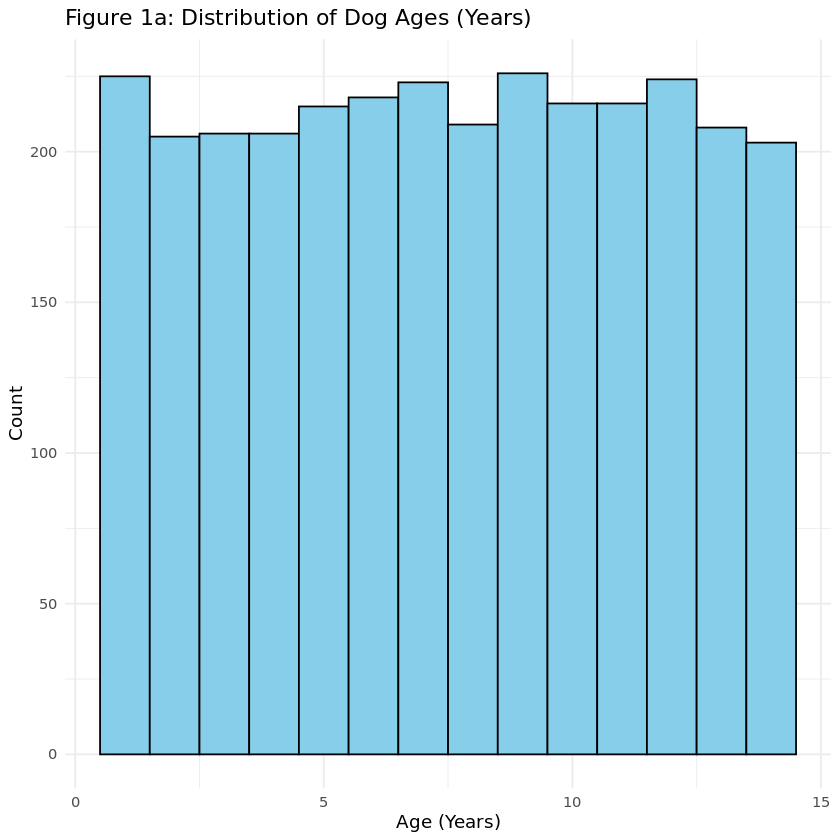

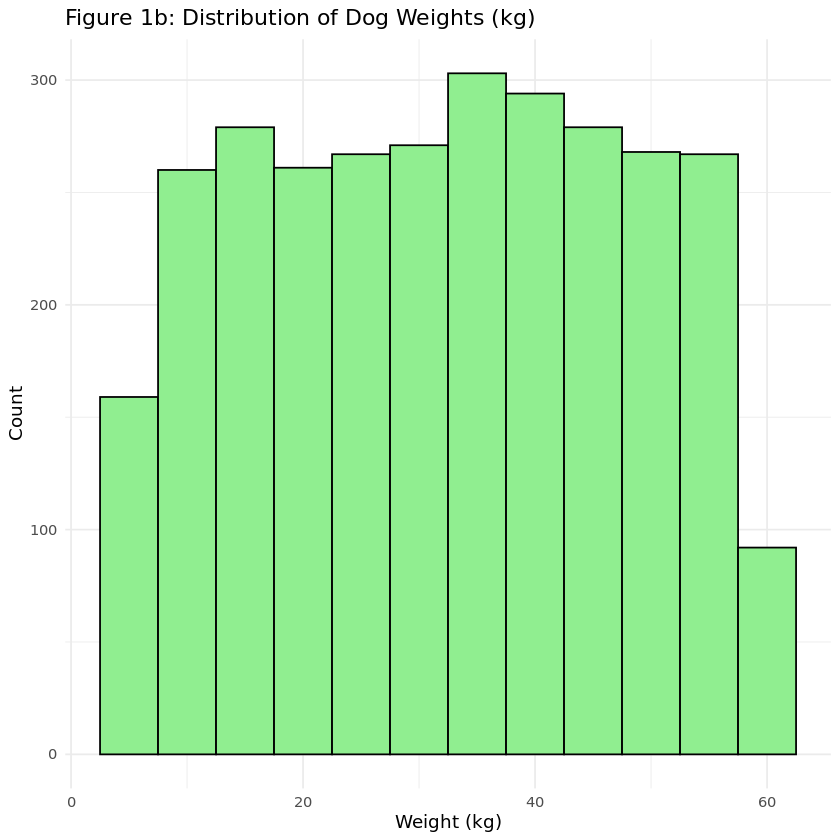

In [10]:
library(ggplot2)
ggplot(dogs, aes(x = Age)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  theme_minimal() +
  labs(title = "Figure 1a: Distribution of Dog Ages (Years)", x = "Age (Years)", y = "Count")

ggplot(dogs, aes(x = Weight)) +
  geom_histogram(binwidth = 5, fill = "lightgreen", color = "black") +
  theme_minimal() +
  labs(title = "Figure 1b: Distribution of Dog Weights (kg)", x = "Weight (kg)", y = "Count")

### 3.2 Figure 2: Age vs Weight Scatterplot

`geom_smooth()` using formula = 'y ~ x'


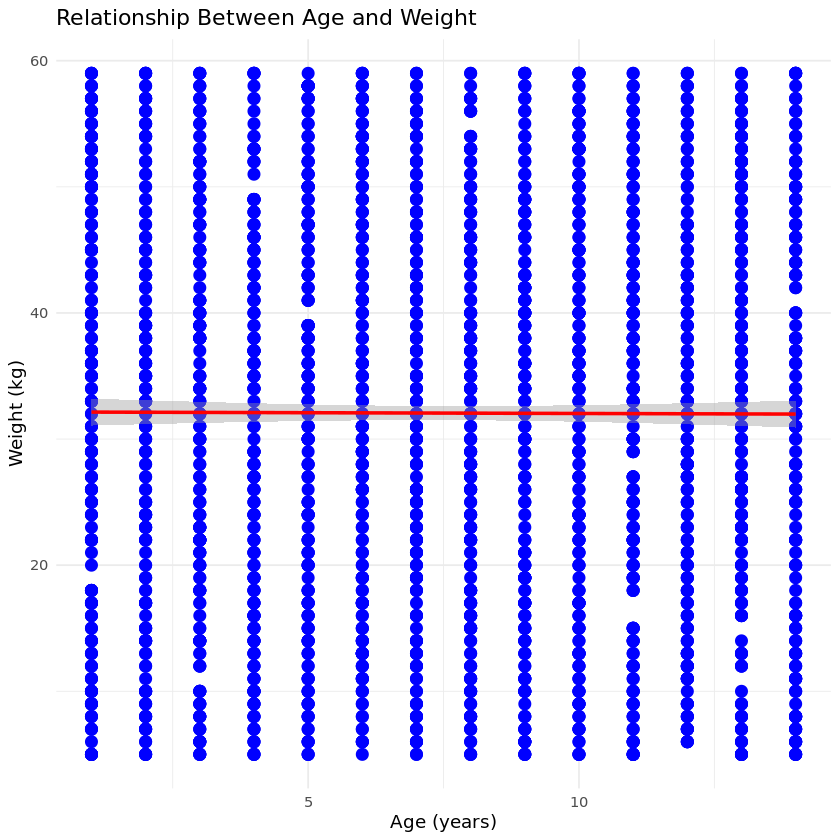

In [11]:
ggplot(dogs, aes(x = Age, y = Weight)) +
  geom_point(size = 3, color = "blue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  theme_minimal() +
  labs(
    title = "Relationship Between Age and Weight",
    x = "Age (years)",
    y = "Weight (kg)"
  )

### 3.3 Figure 3: PCA on numeric variables (Age and Weight) to visualize breed, color, and gender patterns

,Breed,Age,Weight,Color,Gender
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Airedale Terrier,1.3713971,0.1881396,White,Male
2,Jack Russell Terrier,0.6234983,0.7000262,Tan,Female
3,Dogo Argentino,-1.3708985,-1.0275909,Spotted,Female
4,Labrador Retriever,0.3741987,1.5958276,Bicolor,Male
5,French Bulldog,1.1220975,0.4440829,Spotted,Male
6,French Bulldog,0.3741987,-1.5394775,Bicolor,Female


Importance of components:
                          PC1    PC2
Standard deviation     1.0016 0.9984
Proportion of Variance 0.5016 0.4985
Cumulative Proportion  0.5016 1.0000

,Age,Weight
PC1,-0.7071068,0.7071068
PC2,-0.7071068,-0.7071068


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


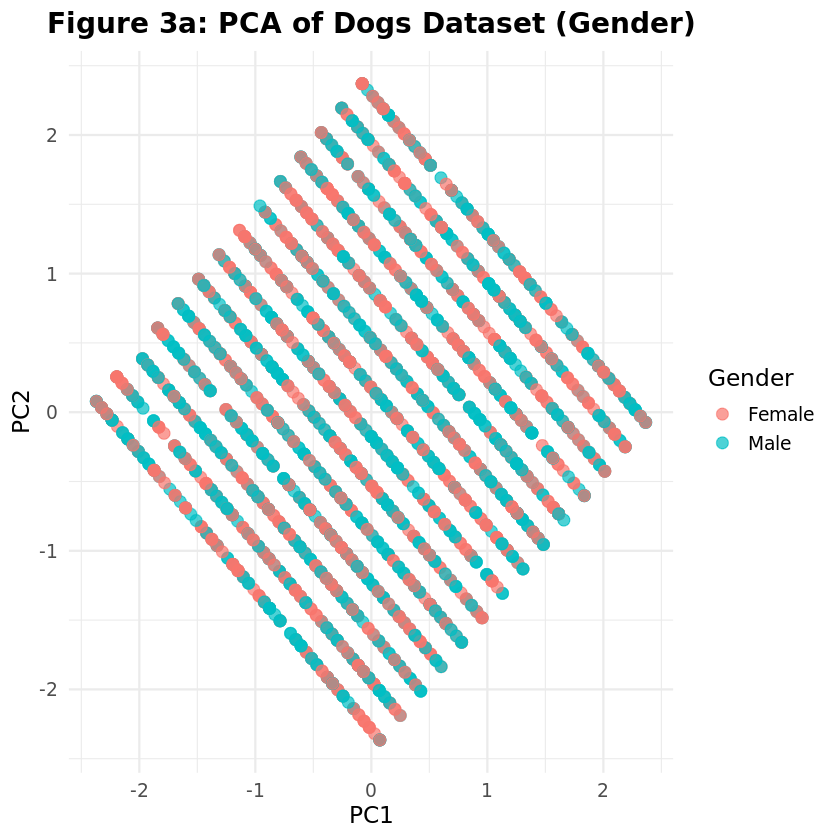

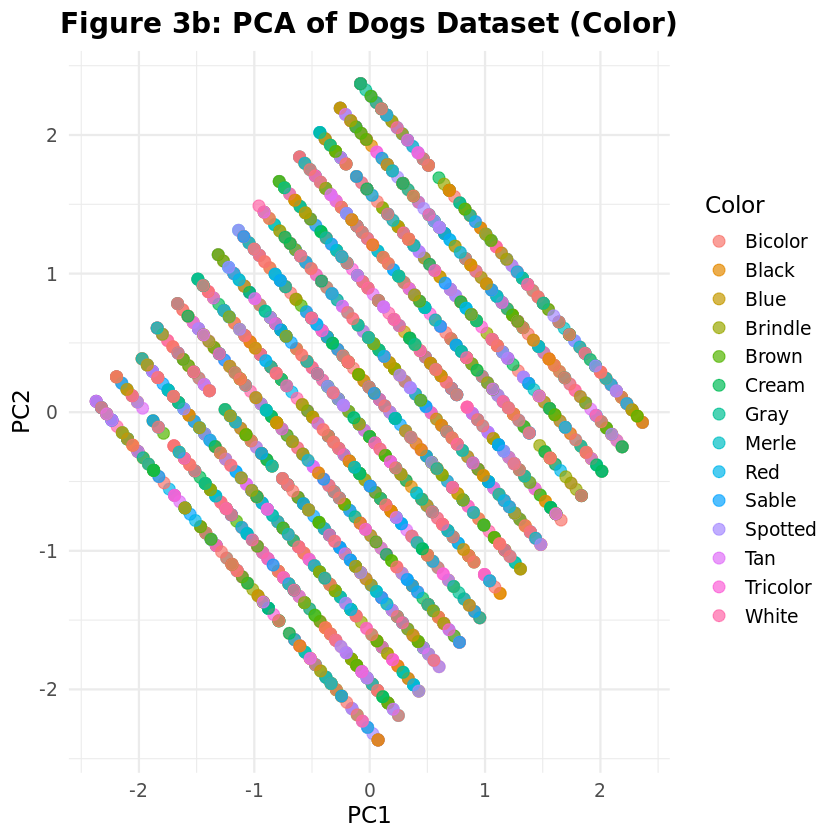

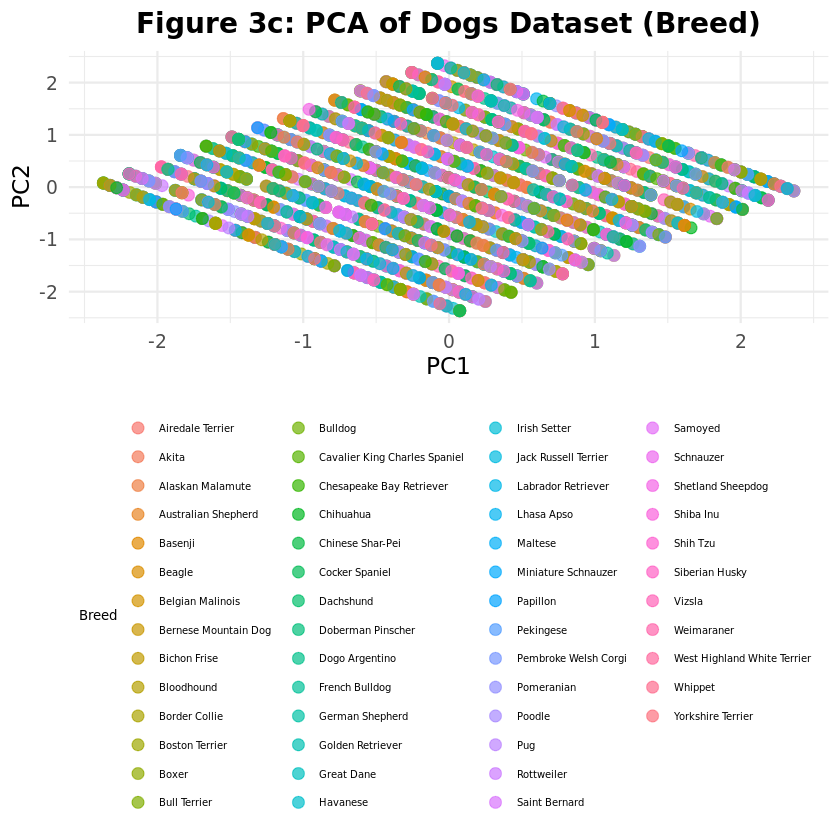

In [12]:
# Load libraries
library(Rtsne)

# 1. Scale Age and Weight
dogs_scaled <- dogs %>%
  mutate(across(c(Age, Weight), ~ as.numeric(scale(.))))
head(dogs_scaled)

# 2. Run PCA
PCA <- prcomp(dogs_scaled %>% select(Age, Weight), center = TRUE, scale. = TRUE)
summary(PCA)

# Optional: PCA rotation matrix
PCA_rotationmatrix <- solve(PCA$rotation)
head(PCA_rotationmatrix)

# 3. Create PCA score data frames with categorical variables
pca_scores <- as_tibble(PCA$x) %>%
  mutate(
    Breed  = dogs$Breed,
    Gender = dogs$Gender,
    Color  = dogs$Color
  )

# 4. Define a reusable plotting function
plot_pca <- function(data, color_var, plot_title) {
  ggplot(data, aes_string(x = "PC1", y = "PC2", color = color_var)) +
    geom_point(alpha = 0.7, size = 3) +
    theme_minimal(base_size = 14) +
    labs(title = plot_title, color = color_var) +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
}

# 5. Generate plots
plot_gender <- plot_pca(pca_scores, "Gender", "Figure 3a: PCA of Dogs Dataset (Gender)")
plot_color  <- plot_pca(pca_scores, "Color",  "Figure 3b: PCA of Dogs Dataset (Color)")
plot_breed <- plot_pca(pca_scores, "Breed", "Figure 3c: PCA of Dogs Dataset (Breed)") +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 6),
    legend.title = element_text(size = 8)
  ) +
  guides(color = guide_legend(ncol = 4))

# 6. Display plots
print(plot_gender)
print(plot_color)
print(plot_breed)


### 3.4 Figure 4: t-SNE on numeric variables (Age and Weight) to visualize breed, color, and gender patterns

Performing PCA
Read the 3000 x 2 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.17 seconds (sparsity = 0.032723)!
Learning embedding...
Iteration 50: error is 78.661214 (50 iterations in 0.28 seconds)
Iteration 100: error is 65.057681 (50 iterations in 0.27 seconds)
Iteration 150: error is 63.184160 (50 iterations in 0.30 seconds)
Iteration 200: error is 62.332175 (50 iterations in 0.31 seconds)
Iteration 250: error is 61.738399 (50 iterations in 0.32 seconds)
Iteration 300: error is 1.430138 (50 iterations in 0.30 seconds)
Iteration 350: error is 1.050093 (50 iterations in 0.31 seconds)
Iteration 400: error is 0.877889 (50 iterations in 0.40 seconds)
Iteration 450: error is 0.790658 (50 iterations in 0.31 seconds)
Iteration 500: error is 0.743894 (50 iterations in 0.31 seconds)
Iteration 550: error is 0.715885 (50 iterations in 0.31 seconds)
Iteration 600

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


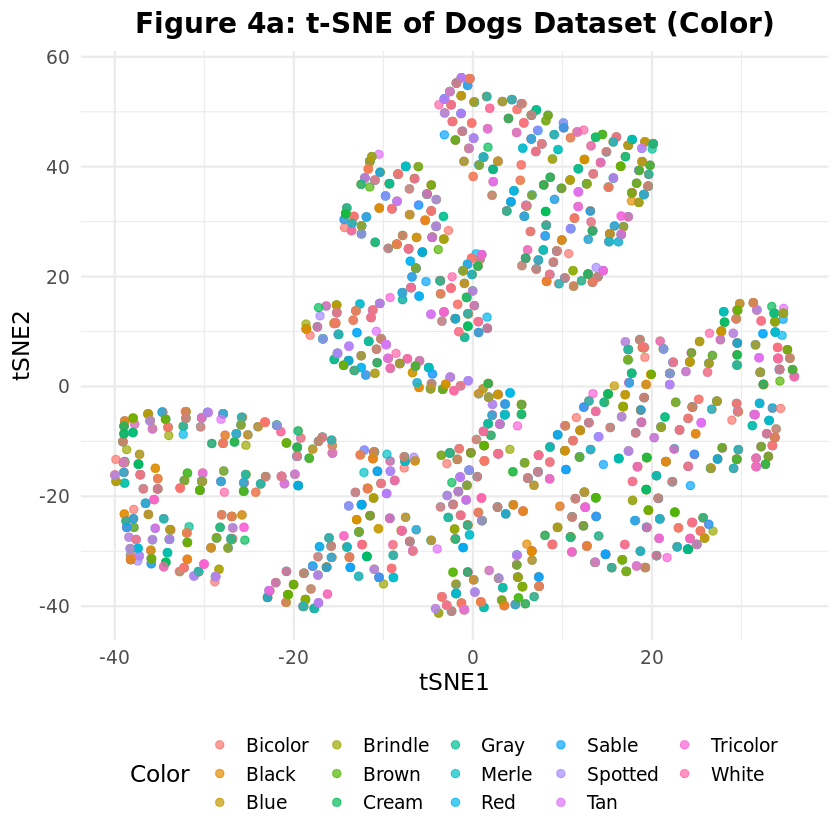

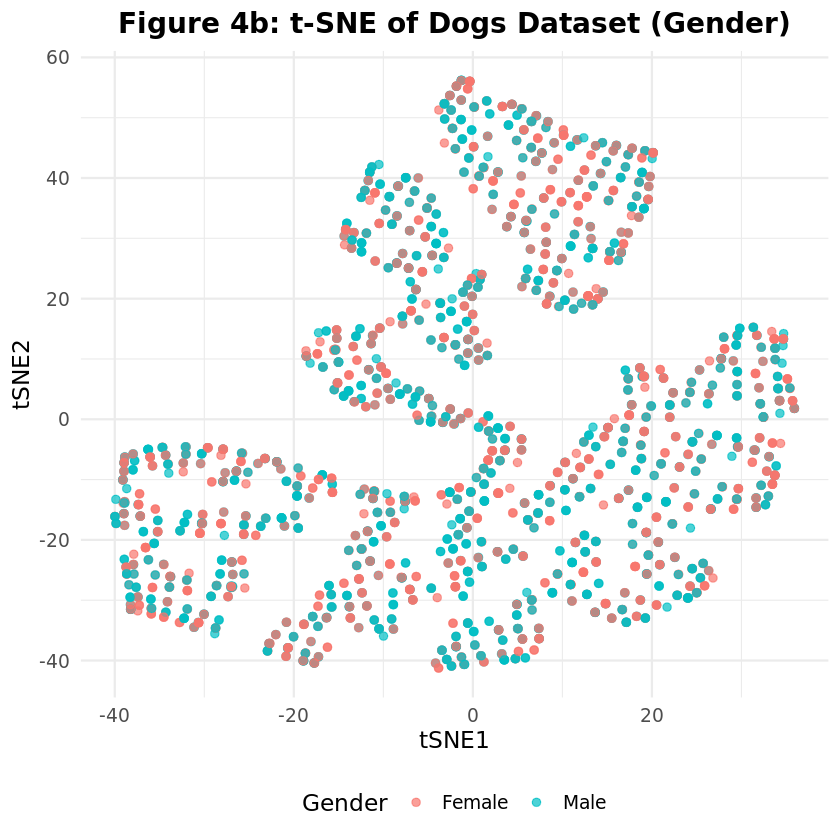

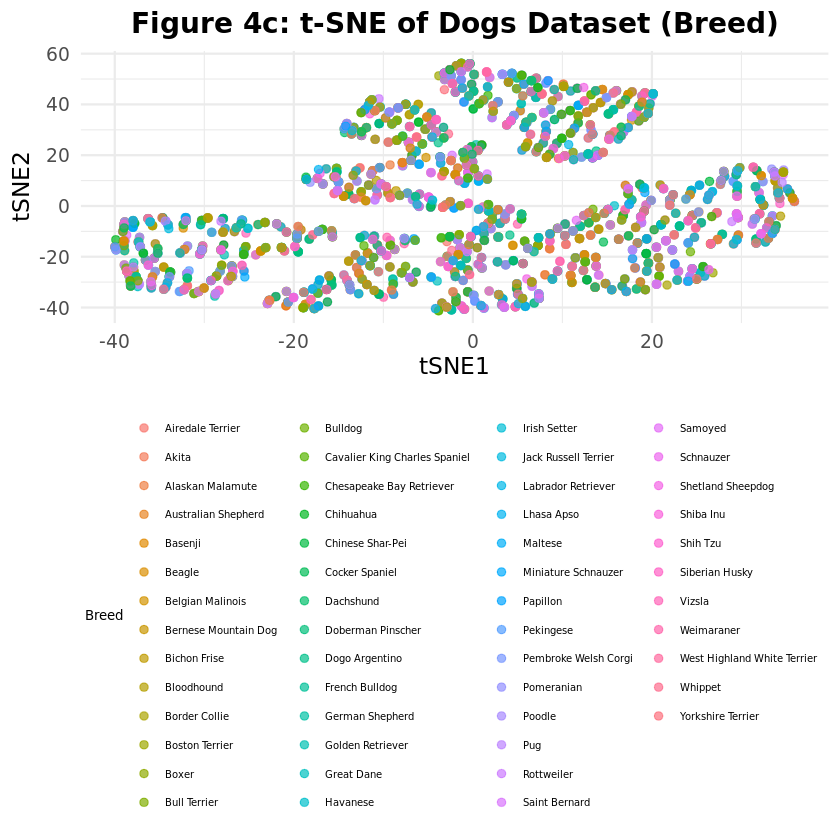

In [13]:
# 1. Prepare t-SNE input
tsne_input <- dogs %>%
  select(Age, Weight) %>%
  # add tiny noise to avoid exact duplicates
  mutate(
    Age = Age + rnorm(n(), 0, 0.01),
    Weight = Weight + rnorm(n(), 0, 0.01)
  )

# 2. Set seed for reproducibility
set.seed(123)

# 3. Run t-SNE
tsne_result <- Rtsne(
  tsne_input, 
  dims = 2, 
  perplexity = 30, 
  verbose = TRUE, 
  check_duplicates = FALSE
)

# 4. Convert t-SNE output to tibble and add categorical variables
tsne_df <- as_tibble(tsne_result$Y) %>%
  rename(tSNE1 = V1, tSNE2 = V2) %>%
  mutate(
    Breed = dogs$Breed,
    Color = dogs$Color,
    Gender = dogs$Gender
  )

# 5. Define a plotting function
plot_tsne <- function(data, color_var, plot_title) {
  ggplot(data, aes_string(x = "tSNE1", y = "tSNE2", color = color_var)) +
    geom_point(alpha = 0.7, size = 2) +
    theme_minimal(base_size = 14) +
    labs(title = plot_title, color = color_var) +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold"),
      legend.position = "bottom"
    )
}

# 6. Create plots
plot_color <- plot_tsne(tsne_df, "Color", "Figure 4a: t-SNE of Dogs Dataset (Color)")
plot_gender <- plot_tsne(tsne_df, "Gender", "Figure 4b: t-SNE of Dogs Dataset (Gender)")
plot_breed <- plot_tsne(tsne_df, "Breed", "Figure 4c: t-SNE of Dogs Dataset (Breed)") +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 6),
    legend.title = element_text(size = 8)
  ) +
  guides(color = guide_legend(ncol = 4))

# 7. Display plots
print(plot_color)
print(plot_gender)
print(plot_breed)

### 3.5 Figure 5: K-means

       Age   Weight
1 7.500525 50.37775
2 7.455179 13.94622
3 7.539789 32.75839


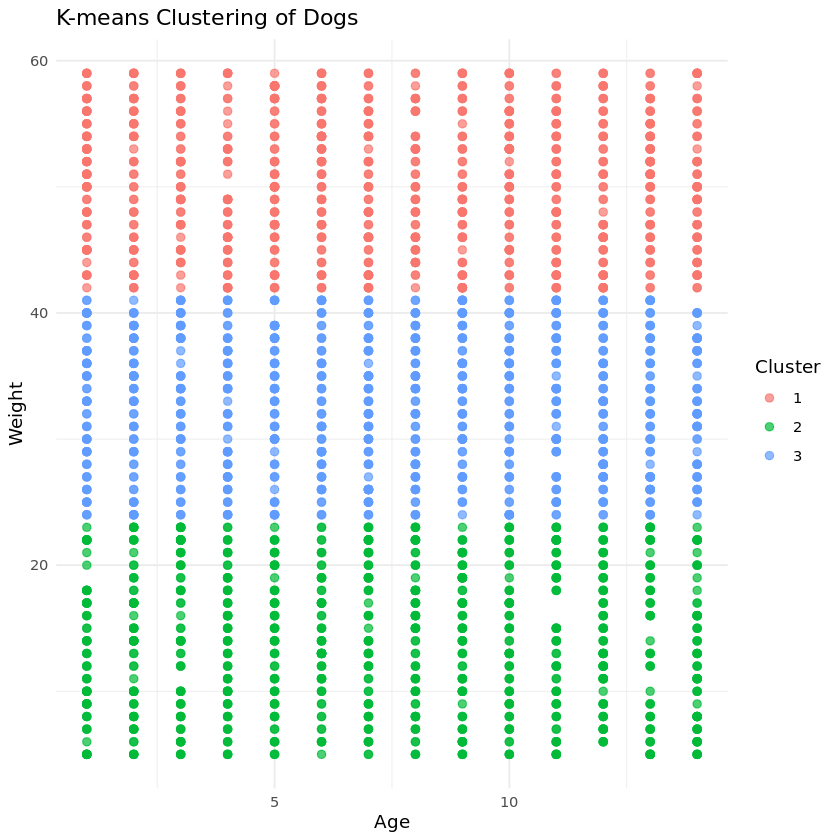

In [14]:
# 1. Prepare the data matrix for k-means
dogs_matrix <- dogs %>%
  select(Age, Weight) %>%   # only numeric columns
  as.matrix()

# 2. Run k-means with 3 clusters (adjust centers as needed)
set.seed(123)  # for reproducibility
kmeans_results <- kmeans(dogs_matrix, centers = 3)

# 3. Inspect the cluster centers
print(kmeans_results$centers)

# 4. Optionally, add cluster assignments back to the dogs dataframe
dogs_clustered <- dogs %>%
  mutate(Cluster = kmeans_results$cluster)

# 5. Quick plot of Age vs Weight colored by cluster
library(ggplot2)
ggplot(dogs_clustered, aes(x = Age, y = Weight, color = factor(Cluster))) +
  geom_point(size = 2, alpha = 0.7) +
  theme_minimal() +
  labs(title = "K-means Clustering of Dogs", color = "Cluster")

### 3.6 Figure 6: Linear Regression Analysis of Dog Weight by Age, Breed, Color, and Gender


Call:
lm(formula = f, data = dogs_scaled[train, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5961 -0.2514  0.0103  0.2343  0.6067 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         0.531457   0.050934  10.434   <2e-16 ***
Age                                -0.023193   0.020054  -1.156   0.2476    
BreedAkita                          0.015028   0.063247   0.238   0.8122    
BreedAlaskan Malamute               0.081148   0.062839   1.291   0.1967    
BreedAustralian Shepherd            0.083378   0.064082   1.301   0.1934    
BreedBasenji                        0.006729   0.065035   0.103   0.9176    
BreedBeagle                         0.034478   0.062541   0.551   0.5815    
BreedBelgian Malinois              -0.027552   0.066705  -0.413   0.6796    
BreedBernese Mountain Dog           0.011043   0.062600   0.176   0.8600    
BreedBichon Frise                   0.020482   0.060414   0.339   0.7

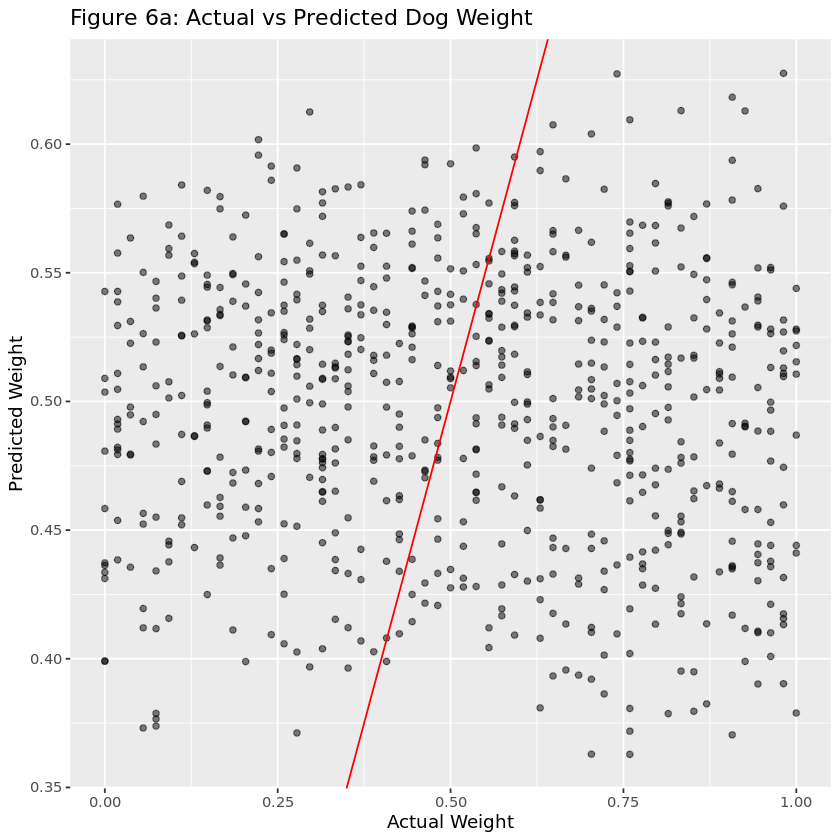

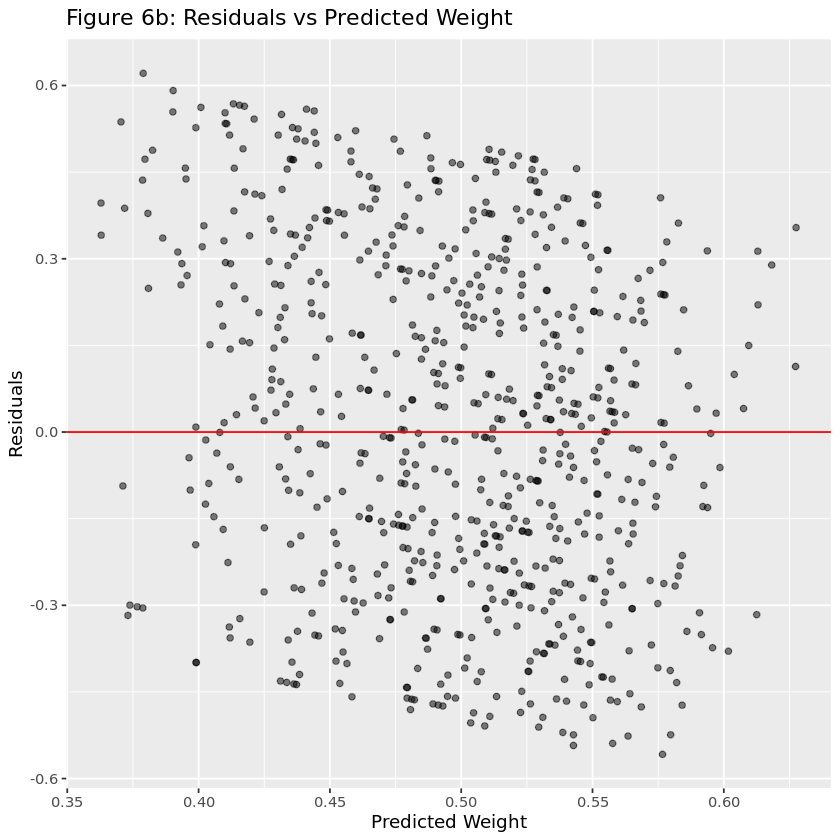

In [116]:
# 1. Optional: Scale numeric columns (Age and Weight)
scale <- function(a) {
  (a - min(a)) / (max(a) - min(a))
}

dogs_scaled <- dogs %>%
  mutate(
    Age = scale(Age),
    Weight = scale(Weight)
  )

# 2. Train/test split
set.seed(123)
train <- runif(nrow(dogs_scaled)) < 0.75
test <- !train

# 3. Define the formula
f <- Weight ~ Age + Breed + Color + Gender

# 4. Fit the linear regression on the training set
m <- lm(f, data = dogs_scaled[train, ])
summary(m)

# 5. Predict on the test set
dogs_test <- dogs_scaled[test, ] %>%
  mutate(Weight_pred = predict(m, newdata = dogs_scaled[test, ]))

# 6. Plot Actual vs Predicted
ggplot(dogs_test, aes(x = Weight, y = Weight_pred)) +
  geom_point(alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "Figure 6a: Actual vs Predicted Dog Weight",
       x = "Actual Weight",
       y = "Predicted Weight")

# 7. Plot Residuals vs Predicted
ggplot(dogs_test, aes(x = Weight_pred, y = Weight - Weight_pred)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "red") +
  labs(title = "Figure 6b: Residuals vs Predicted Weight",
       x = "Predicted Weight",
       y = "Residuals")

## 4. Figure Conclusions 

### 4.1 Figure 1: Age and Weight Distribution
Figure 1a: Distribution of Dog Ages (Years)
This histogram displays the frequency distribution of dogs’ ages (in years). The data span from 1 to 14 years, with most dogs clustered around the median of 8 years. The unimodal shape suggests a relatively balanced sample with no strong age bias, though there may be fewer very young or very old dogs represented.

Figure 1b: Distribution of Dog Weight (kg)
This histogram shows the distribution of dog weights (in kilograms). Weights range from 5 to 59 kg, with a concentration around the median of 33 kg. The right tail indicates the presence of heavier breeds, implying moderate right-skewness in the population weight distribution.

### 4.2 Figure 2: Age VS. Weight Scatterplot
This scatter plot explores the relationship between dog age and weight. The cloud of points indicates no strong linear correlation; heavier dogs appear across most age groups. However, some clustering may occur for medium-weight dogs around ages 5–10, typical of adult life stages.

### 4.3 Figure 3: PCA 
The first two principal components capture all variance, confirming that the two numeric features (Age and Weight) are sufficient to describe the dataset’s linear structure. PC1 captures the inverse relationship between age and weight, while PC2 captures their simultaneous variation.

Figure 3a: PCA of Dogs Dataset (Gender): There is no visible separation between male and female dogs in the PCA space. Both genders overlap entirely across the two principal components. This suggests that Age and Weight distributions are similar between genders, meaning there is no strong gender-based pattern in these features.

Figure 3b: PCA of Dogs Dataset (Color): Similar to the gender PCA, dogs of all coat colors are distributed throughout the PCA space without clear groupings. This implies that color is not correlated with either age or weight — these physical attributes are independent of coat color in the dataset.

Figure 3c: PCA of Dogs Dataset (Breed) There is still a large degree of overlap between breeds, though some mild clustering can be observed for certain breeds. This overlap suggests that age and weight alone do not fully distinguish breeds, though some breeds may occupy characteristic ranges (e.g., larger or smaller dogs).
To separate breeds more effectively, additional features (such as height, lifespan, or body measurements) would likely be needed.

## 4.4 Figure 4: t-SNE
Figure 4a: t-SNE of Dogs Dataset (Color): The plot shows that color does not appear to form distinct clusters in the t-SNE space — dogs of different colors are well mixed. This suggests that coat color is not strongly correlated with the other features in the dataset (e.g., breed, size, or weight). Color variation is likely distributed across multiple breeds and characteristics rather than being a defining or separating feature.

Figure 4b: t-SNE of Dogs Dataset (Gender): Male and female dogs are distributed almost evenly across the entire space. There are no clear separations or clusters based on gender. This implies that gender has little to no influence on the combination of features that define similarity between dogs in the dataset.

Figure 4c: Some clustering by breed can be observed — certain groups of points appear to be more tightly clustered. This indicates that breed is a stronger factor influencing the dogs’ features (such as weight, height, or other attributes). However, there is still some overlap between breeds, which may reflect similarities between certain types of dogs or mixed-breed individuals.

## 4.5 Figure 5: Kmeans
The figure shows a scatter plot with Age vs. Weight, with dogs grouped into three clusters identified by K-means clustering.

Cluster 1 (red) represents heavier dogs (likely large breeds).
Cluster 2 (green) represents lighter dogs.
Cluster 3 (blue) represents medium-weight dogs.

Age does not strongly separate the clusters — the key distinction appears to be driven by weight, suggesting that weight alone captures much of the natural grouping among dogs.

## 4.6 Figure 6: Comparison of Average Dog Weight Across Breeds
Figure 6a: Actual vs Predicted Dog Weight
This scatter plot compares actual vs. predicted weights from a regression model, with the red line representing the ideal 1:1 relationship (perfect predictions).
The data points are widely scattered around the red line, indicating a fair amount of prediction error. The model captures some general trends, but it struggles to predict weight precisely for individual dogs.
Possible reasons: high variability within breeds, missing predictive features, or limited training data.

Figure 6b: Residuals vs Predicted Weight
This plot shows the residuals (errors between predicted and actual weight) plotted against the predicted weight values.
The residuals appear randomly scattered around zero, without a clear pattern.
This suggests that the model’s errors are not systematically biased — a good sign of model validity. However, the spread of residuals indicates that predictions still have moderate variance, meaning the model could be improved with more features or non-linear methods.

## 5. Exploratory Questions

### 5.1 Do older dogs tend to weigh more than younger dogs stratified by breed?
Figure 2 Age vs Weight Scatterplot showed the relationship between dog age and weight. No strong linear correlation was found. To further understand the relationship between age and weight, stratifying by breed will better show the growth patterns of the dogs. 

`geom_smooth()` using formula = 'y ~ x'


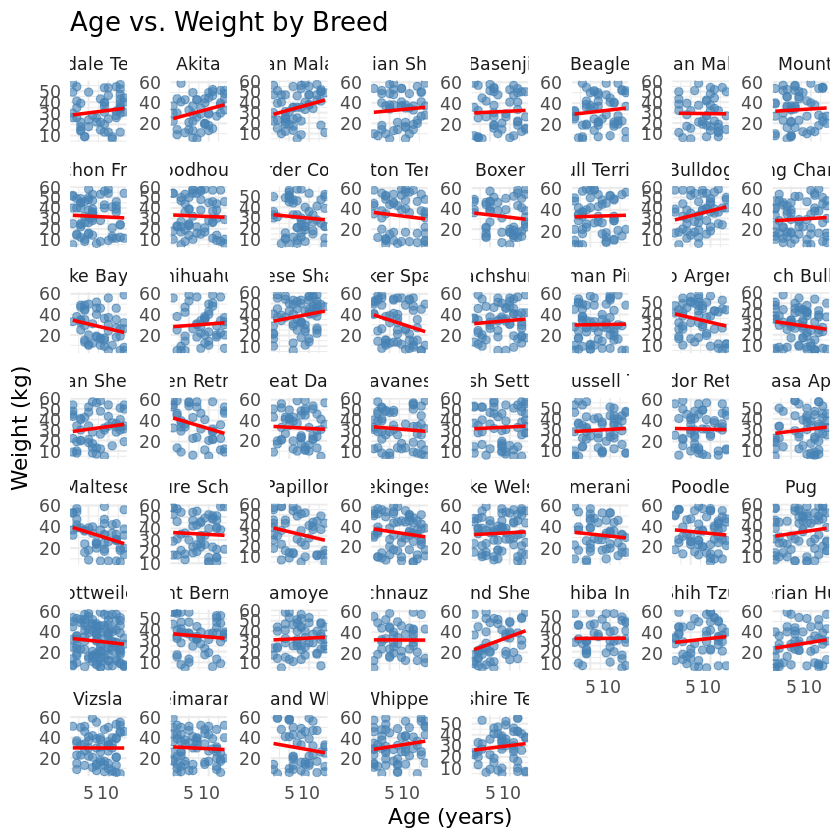

In [34]:
ggplot(dogs, aes(x = Age, y = Weight)) +
  geom_point(alpha = 0.6, size = 2, color = "steelblue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  facet_wrap(~ Breed, scales = "free_y") +
  theme_minimal(base_size = 13) +
  labs(
    title = "Age vs. Weight by Breed",
    x = "Age (years)",
    y = "Weight (kg)"
  )

### 5.2 Do certain breeds have more color variation than others?
Previous analyses (Figures 3b and 4a) showed that coat color is not correlated with weight or age. However, those results did not examine the relationship between breed and color variation. It is possible that some breeds have a wider range of acceptable or naturally occurring coat colors, while others are more uniform.
To explore this question, the number of unique coat colors should be calculated for each breed and it can be visualized using a heatmap to highlight which breeds display the greatest color diversity.

# A tibble: 53 × 2
   Breed                         Color_Diversity
   <chr>                                   <int>
 1 Airedale Terrier                           14
 2 Australian Shepherd                        14
 3 Basenji                                    14
 4 Belgian Malinois                           14
 5 Bichon Frise                               14
 6 Bloodhound                                 14
 7 Border Collie                              14
 8 Boxer                                      14
 9 Bulldog                                    14
10 Chesapeake Bay Retriever                   14
11 Chihuahua                                  14
12 Chinese Shar-Pei                           14
13 Cocker Spaniel                             14
14 Dachshund                                  14
15 Doberman Pinscher                          14
16 Dogo Argentino                             14
17 French Bulldog                             14
18 Great Dane                                 14
1

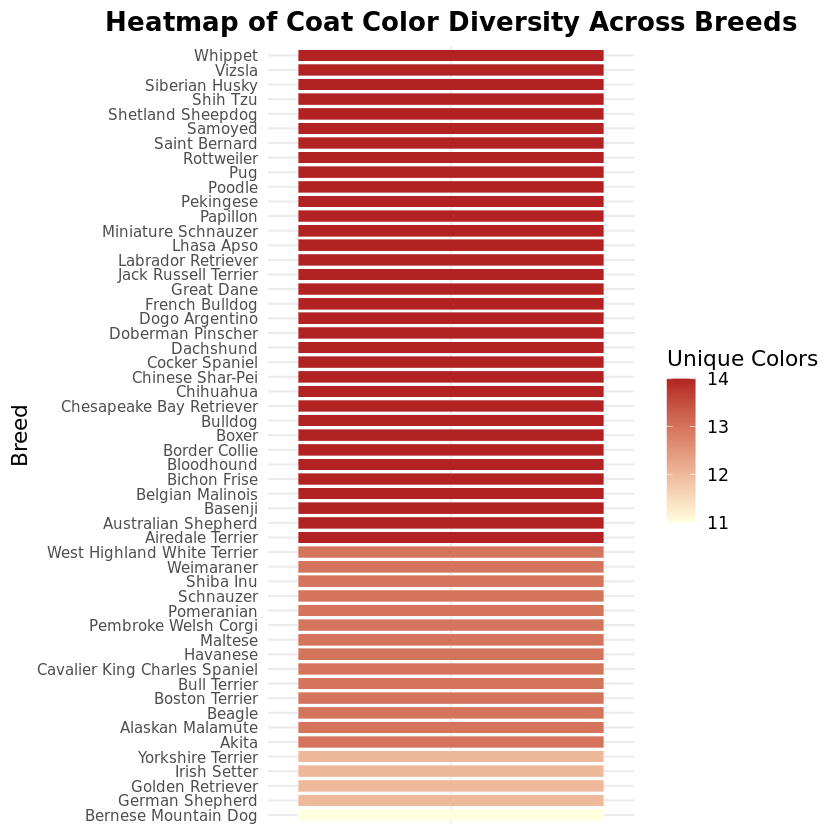

In [44]:
color_diversity <- dogs %>%
  group_by(Breed) %>%
  summarise(Color_Diversity = n_distinct(Color)) %>%
  arrange(desc(Color_Diversity))
print(color_diversity, n=53)

#Heatmap
ggplot(color_diversity, 
       aes(x = "", 
           y = reorder(Breed, Color_Diversity), 
           fill = Color_Diversity)) +
  geom_tile(color = "white", height = 0.8) +
  scale_fill_gradient(low = "lightyellow", high = "firebrick") +
  theme_minimal(base_size = 13) +
  labs(
    title = "Heatmap of Coat Color Diversity Across Breeds",
    x = NULL,
    y = "Breed",
    fill = "Unique Colors"
  ) +
  theme(
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.text.y = element_text(size = 9),
    plot.title = element_text(face = "bold", hjust = 0.5)
  )

### 5.3 Are certain breeds heavier than other breeds?
Figures 3c and 4c indicate that breed may play a stronger role in explaining variation in weight. Mild clustering by breed was observed in both the PCA and t-SNE plots, suggesting that dogs of similar breeds tend to share comparable size profiles.

To investigate this relationship more directly, the distribution of weights across breeds could be examined using summary statistics and a boxplot. This analysis helps clarify whether certain breeds are consistently heavier or lighter than others, and whether breed type can meaningfully account for differences in body weight.

# A tibble: 53 × 4
   Breed                         Mean_Weight SD_Weight Count
   <chr>                               <dbl>     <dbl> <int>
 1 Chinese Shar-Pei                     38.2      14.0    64
 2 Golden Retriever                     35.5      16.5    44
 3 Miniature Schnauzer                  35.3      15.1    55
 4 Alaskan Malamute                     34.6      14.9    55
 5 Bulldog                              34.6      14.8    55
 6 Pembroke Welsh Corgi                 34.5      14.7    67
 7 Saint Bernard                        34.3      14.3    54
 8 Bull Terrier                         34.2      16.0    55
 9 Dachshund                            33.9      14.8    59
10 Dogo Argentino                       33.7      15.5    55
11 Pug                                  33.6      17.3    65
12 Poodle                               33.5      15.4    61
13 Australian Shepherd                  33.4      16.4    51
14 Pekingese                            33.3      16.2    68
15 Be

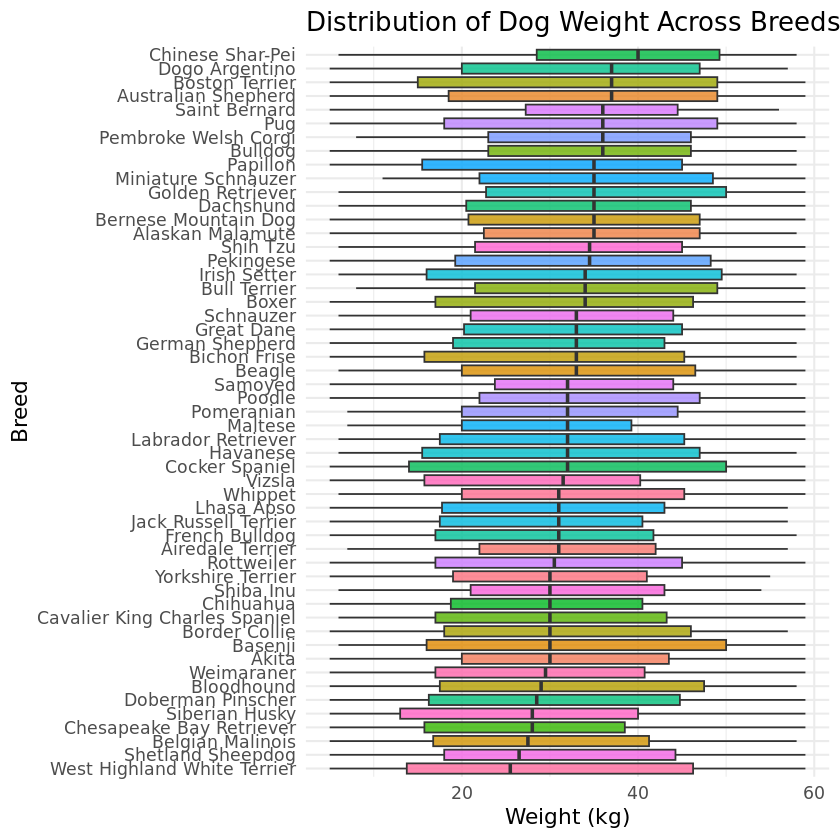

In [4]:
# Calculate mean and SD of weight per breed
breed_weights <- dogs %>%
  group_by(Breed) %>%
  summarise(
    Mean_Weight = mean(Weight, na.rm = TRUE),
    SD_Weight = sd(Weight, na.rm = TRUE),
    Count = n()
  ) %>%
  arrange(desc(Mean_Weight))
print(breed_weights, n = 53)

# Boxplot of Weight by Breed
ggplot(dogs, aes(x = reorder(Breed, Weight, median), y = Weight, fill = Breed)) +
  geom_boxplot(show.legend = FALSE, alpha = 0.8) +
  coord_flip() +
  theme_minimal(base_size = 13) +
  labs(
    title = "Distribution of Dog Weight Across Breeds",
    x = "Breed",
    y = "Weight (kg)"
  )